In [ ]:
!wget http://download.cs.stanford.edu/deep/CheXpert-v1.0-small.zip

--2021-12-13 19:17:43--  http://download.cs.stanford.edu/deep/CheXpert-v1.0-small.zip
Resolving download.cs.stanford.edu (download.cs.stanford.edu)... 171.64.64.22
Connecting to download.cs.stanford.edu (download.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11557753157 (11G) [application/zip]
Saving to: ‘CheXpert-v1.0-small.zip’

CheXpert-v1.0-small 100%[===================>]  10.76G  4.97MB/s    in 36m 41s 

2021-12-13 19:54:25 (5.01 MB/s) - ‘CheXpert-v1.0-small.zip’ saved [11557753157/11557753157]



In [ ]:
!unzip /content/CheXpert-v1.0-small.zip

Streaming output truncated to the last 5000 lines.
  inflating: CheXpert-v1.0-small/train/patient21643/study3/view2_lateral.jpg  
  inflating: CheXpert-v1.0-small/train/patient21643/study3/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient21643/study1/
  inflating: CheXpert-v1.0-small/train/patient21643/study1/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient21643/study2/
  inflating: CheXpert-v1.0-small/train/patient21643/study2/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient63218/
   creating: CheXpert-v1.0-small/train/patient63218/study1/
  inflating: CheXpert-v1.0-small/train/patient63218/study1/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient08046/
   creating: CheXpert-v1.0-small/train/patient08046/study1/
  inflating: CheXpert-v1.0-small/train/patient08046/study1/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient08046/study5/
  inflating: CheXpert-v1.0-small/train/patient08046/study5/view1_fron

In [ ]:
import pandas as pd

In [ ]:
train=pd.read_csv('/content/CheXpert-v1.0-small/train.csv')
train.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
train.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

In [ ]:
# feature selection
diseases = ['Cardiomegaly','Edema','Consolidation','Atelectasis','Pleural Effusion']

In [ ]:
train=train[['Path']+diseases]

In [ ]:
# Data analysis
import cv2
import matplotlib.pyplot as plt

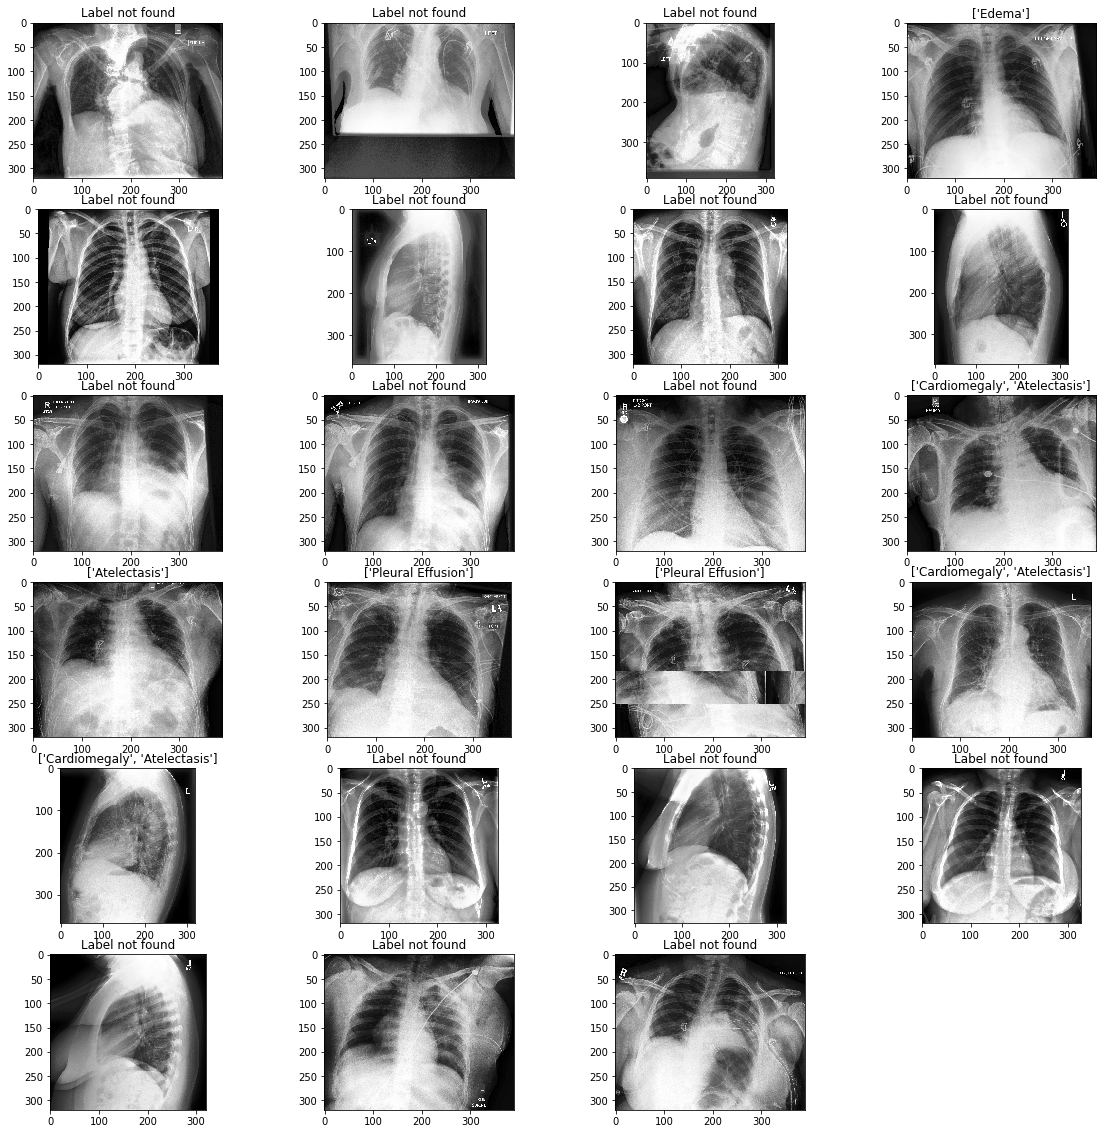

In [ ]:


def data_analysis(train):
  rows = 6
  columns = 4
  labels = []
  x = []
  fig=plt.figure(figsize=(20,20))
  sample_data=train.copy()
  for i in range(24):
    x.append(sample_data.iloc[i]['Path'])
    labels.append([f for f in diseases if sample_data.iloc[i][f]==1])
  for i in range(1, rows*columns):
        ax = fig.add_subplot(rows, columns, i)
        try:
          if len(labels[i])>0:
              ax.title.set_text(labels[i])
          else:
              ax.title.set_text('Label not found')
          plt.imshow(cv2.imread(x[i]), interpolation='nearest')
        except:
          pass      
  plt.show()
data_analysis(train)

In [ ]:
from tqdm import notebook
sample_data=train.copy()
def get_dimensions(file):
    img = cv2.imread(file)
    h,w = img.shape[:2]
    return h,w
dimensions=[]    
for i in notebook.tqdm(range(len(sample_data))):    
    dimensions.append([train.loc[i]['Path']]+list(get_dimensions(sample_data.loc[i]['Path'])))
data=pd.DataFrame(dimensions,columns=['Path','Height','Width'])   
data.head()

  0%|          | 0/223414 [00:00<?, ?it/s]

,Path,Height,Width
0,CheXpert-v1.0-small/train/patient00001/study1/...,320,389
1,CheXpert-v1.0-small/train/patient00002/study2/...,320,390
2,CheXpert-v1.0-small/train/patient00002/study1/...,320,390
3,CheXpert-v1.0-small/train/patient00002/study1/...,390,320
4,CheXpert-v1.0-small/train/patient00003/study1/...,320,390


In [ ]:
# finding the sizee of every image in the dataset
sizes = data.groupby(['Height', 'Width']).size().reset_index().rename(columns={0:'count'})

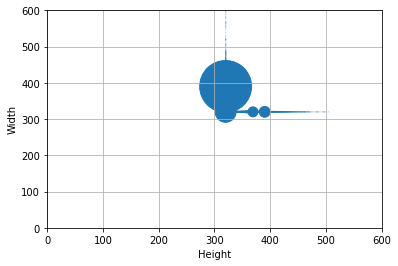

In [ ]:
# Analysing the size of images
sizes.plot.scatter(x='Height',y='Width',s=sizes['count']/50 ,xlim=(0,600), ylim=(0,600), grid=True)

In [ ]:
# finding percentage of na values present in each column
import numpy as np
pd.DataFrame({'Disease':diseases[1:],'Percentage of null values':[np.round(train[disease].isna().mean()*100,4) for disease in diseases[1:]]})


,Disease,Percentage of null values
0,Edema,61.5261
1,Consolidation,68.3896
2,Atelectasis,69.3649
3,Pleural Effusion,40.3748


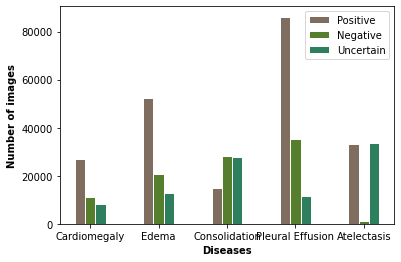

In [ ]:
import numpy as np
barWidth = 0.15
bars1=[len(data1[data1[feature]==1]) for feature in features]
bars2=[len(data1[data1[feature]==0]) for feature in features]
bars3=[len(data1[data1[feature]==-1]) for feature in features]
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Positive')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Negative')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Uncertain')
 
# Add xticks on the middle of the group bars
plt.xlabel('Diseases', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], features)
plt.ylabel('Number of images', fontweight='bold') 
# Create legend & Show graphic
plt.legend()
plt.show()

Applying LSR to uncertain values and filling the missing values with 0

Each observation in the dataset has one of three training labels: 0 (negative), 1 (positive), or u (unknown) (uncertain). The dataset's inventor has offered a number approaches to dealing with unclear data, including.


1.   U-Ignore: During training, we ignore the labels that are unclear.
2.   U-Zeroes: We assign a value of 0 to all instances of the uncertain label.
3.  U-Ones: We assign 1 to all instances of the ambiguous label.


Label smoothing regularisation is a new advancement in machine learning that we used (LSR). Label smoothing is a regularisation approach that causes the target variable to be perturbed, making the model's predictions less definite. Because it prevents the greatest logits supplied into the sigmoid function from growing significantly larger than the rest, it is considered a regularisation strategy. So we utilised U-zeros+LSR to transfer the unknown values to a number that ranges from 0-0.3.









In [ ]:
import random
data=train.copy()
data=data.fillna(0)
data['Path']=data['Path'].apply(lambda element:'/content/Chexperttraining1/'+element.replace('/',''))
for disease in data.columns[1:]:
    data[disease]=data[disease].apply(lambda element: random.uniform(0.0,0.3) if element==-1 else element)
data.to_csv(r'/content/processed_csv.csv', index = False)    

In [ ]:
data.head()

,Path,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion
0,/content/Chexperttraining1/CheXpert-v1.0-small...,0.000000,0.000000,0.000000,0.000000,0.000000
1,/content/Chexperttraining1/CheXpert-v1.0-small...,0.002816,0.261206,0.031667,0.075606,0.213337
2,/content/Chexperttraining1/CheXpert-v1.0-small...,0.000000,0.000000,0.039469,0.000000,0.000000
3,/content/Chexperttraining1/CheXpert-v1.0-small...,0.000000,0.000000,0.099854,0.000000,0.000000
4,/content/Chexperttraining1/CheXpert-v1.0-small...,0.000000,1.000000,0.000000,0.000000,0.000000


Converting the dataset to folder strucutre so that we can train it as we cannot directly take everything at one time as the size of dataset is 10,00000

In [ ]:
import shutil,os

os.mkdir('/content/Chexperttraining1/')
PATIENT_PATH='/content/CheXpert-v1.0-small/train'
from tqdm import notebook
patient_dir=os.listdir('/content/CheXpert-v1.0-small/train')
for patient in notebook.tqdm(patient_dir):
  STUDY_PATH=PATIENT_PATH+'/'+patient
  study_dir=os.listdir(STUDY_PATH)
  for study in study_dir:
    
    IMAGE_DIRECTORY=STUDY_PATH+'/'+study
    img_dir=os.listdir(IMAGE_DIRECTORY)
    for img in img_dir:
      source=IMAGE_DIRECTORY+'/'+img
      destination='/content/Chexperttraining1/CheXpert-v1.0-smalltrain'+patient+study+img
      
      shutil.copy2(source, destination) 


  0%|          | 0/64540 [00:00<?, ?it/s]

In [ ]:
import shutil,os

os.mkdir('/content/Chexperttraining1/')
PATIENT_PATH='/content/CheXpert-v1.0-small/valid'
from tqdm import notebook
patient_dir=os.listdir('/content/CheXpert-v1.0-small/train')
for patient in notebook.tqdm(patient_dir):
  STUDY_PATH=PATIENT_PATH+'/'+patient
  study_dir=os.listdir(STUDY_PATH)
  for study in study_dir:
    
    IMAGE_DIRECTORY=STUDY_PATH+'/'+study
    img_dir=os.listdir(IMAGE_DIRECTORY)
    for img in img_dir:
      source=IMAGE_DIRECTORY+'/'+img
      destination='/content/Chexperttraining1/CheXpert-v1.0-smalltrain'+patient+study+img
      
      shutil.copy2(source, destination) 


In [ ]:
# Taerget variables
features = ['Cardiomegaly','Edema','Consolidation','Atelectasis','Pleural Effusion']

In [ ]:
import pandas as pd


data_path='/content/Chexperttraining1'
data1=pd.read_csv('/content/processed_csv.csv')
data=data1

len(data)

223414

Preparing th data for training .The data will be read through th 'Path' variable and rescaled, rotated, widht shifted, flipped etc. 

In [ ]:
import tensorflow as tf
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.0, 
                              rotation_range=5,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              horizontal_flip=True,
                              validation_split = 0.2)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
image_size=224

valid_generator=datagen.flow_from_dataframe(dataframe=data1, directory=data_path, 
                                                x_col='Path', y_col=features, seed = 42, 
                                                class_mode='raw', target_size=(image_size,image_size), batch_size=32, subset = "validation")
train_generator=datagen.flow_from_dataframe(dataframe=data1, directory=data_path, 
                                                x_col='Path', y_col=features, seed = 42, 
                                                class_mode='raw', target_size=(image_size,image_size), batch_size=32, subset = "training")    



Found 44682 validated image filenames.
Found 178732 validated image filenames.


In [ ]:
test_data=pd.read_csv('/content/CheXpert-v1.0-small/valid.csv')
test_data['Path']=test_data['Path'].apply(lambda element:'/content/Chexperttesting/'+element.replace('/',''))

In [ ]:

test_generator=datagen.flow_from_dataframe(dataframe=test_data,directory='/content/Chexperttesting', x_col='Path', y_col=features, seed = 42, 
                                                class_mode='raw', target_size=(image_size,image_size), batch_size=32)

Found 234 validated image filenames.


In [ ]:
test_data

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,/content/Chexperttesting/CheXpert-v1.0-smallva...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/content/Chexperttesting/CheXpert-v1.0-smallva...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,/content/Chexperttesting/CheXpert-v1.0-smallva...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,/content/Chexperttesting/CheXpert-v1.0-smallva...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/content/Chexperttesting/CheXpert-v1.0-smallva...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,/content/Chexperttesting/CheXpert-v1.0-smallva...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230,/content/Chexperttesting/CheXpert-v1.0-smallva...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
231,/content/Chexperttesting/CheXpert-v1.0-smallva...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
232,/content/Chexperttesting/CheXpert-v1.0-smallva...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Tranfer Learning:- InceptionResNetV2

In [ ]:
import pandas as pd
import tensorflow as tf

data_path='/content/Chexperttraining1'#training data 

base_model = tf.keras.applications.InceptionResNetV2(include_top= False, input_shape=(image_size,image_size,3), weights='imagenet')
# add a global spatial average pooling layer
x = base_model.output

x = tf.keras.layers.GlobalAveragePooling2D(input_shape=(1024,1,1))(x)
# Add a flattern layer 
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
# Add a fully-connected layer
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(5, activation='sigmoid')(x)

# this is the model we will train
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
features=['Cardiomegaly', 'Edema', 'Consolidation', 'Pleural Effusion','Atelectasis']


for layer in base_model.layers:
    layer.trainable = False
        
image_size=224

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
initial_learning_rate=1e-3,
decay_steps=STEP_SIZE_TRAIN,
decay_rate=0.1)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC(multi_label=True)])
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='InceptionResNetmodelLSRZero_bestauc.hdf5', 
                            verbose=1, save_best_only=True,monitor='val_auc',mode='max')
checkpointer1=tf.keras.callbacks.ModelCheckpoint(filepath='InceptionResNetmodelLSRZero_bestacc.hdf5', 
                            verbose=1, save_best_only=True,monitor='val_accuracy',mode='max')

epochs=20
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=epochs, callbacks = [checkpointer,checkpointer1],use_multiprocessing=True)    

    


**Xception**

In [ ]:
import pandas as pd
import tensorflow as tf

data_path='/content/Chexperttraining1'#training data 

base_model = tf.keras.applications.Xception(include_top= False, input_shape=(image_size,image_size,3), weights='imagenet')
# add a global spatial average pooling layer
x = base_model.output

x = tf.keras.layers.GlobalAveragePooling2D(input_shape=(1024,1,1))(x)
# Add a flattern layer 
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
# Add a fully-connected layer
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(5, activation='sigmoid')(x)

# this is the model we will train
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
features=['Cardiomegaly', 'Edema', 'Consolidation', 'Pleural Effusion','Atelectasis']


for layer in base_model.layers:
    layer.trainable = False
        
image_size=224

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
initial_learning_rate=1e-3,
decay_steps=STEP_SIZE_TRAIN,
decay_rate=0.1)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC(multi_label=True)])
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='InceptionResNetmodelLSRZero_bestauc.hdf5', 
                            verbose=1, save_best_only=True,monitor='val_auc',mode='max')
checkpointer1=tf.keras.callbacks.ModelCheckpoint(filepath='InceptionResNetmodelLSRZero_bestacc.hdf5', 
                            verbose=1, save_best_only=True,monitor='val_accuracy',mode='max')

epochs=20
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=epochs, callbacks = [checkpointer,checkpointer1],use_multiprocessing=True)    

    


# Evaluating the model

**InceptionResNetV2**

In [ ]:
from keras.models import load_model
features=['Cardiomegaly', 'Edema', 'Consolidation', 'Pleural Effusion','Atelectasis']
image_size=224

base_model = tf.keras.applications.InceptionResNetV2(include_top= False, input_shape=(image_size,image_size,3), weights='imagenet')
# add a global spatial average pooling layer
x = base_model.output

x = tf.keras.layers.GlobalAveragePooling2D(input_shape=(1024,1,1))(x)
# Add a flattern layer 
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(5, activation='sigmoid')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
model.load_weights('/content/InceptionResNetmodelLSRZero_bestauc.hdf5')

In [ ]:
y_labels = test_generator.labels
print(y_labels.shape)
test_generator.reset()

y_pred_keras = model.predict_generator(test_generator,verbose = 1)
print(y_pred_keras.shape)

(234, 5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


8/8 [==============================] - 6s 380ms/step
(234, 5)


In [ ]:
y_pred_keras.shape
pred=y_pred_keras
pred_bool = (pred >0.5)

No handles with labels found to put in legend.


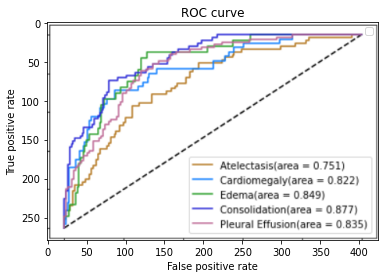

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import cv2
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

for ii in range(0, y_pred_keras.shape[1]):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_labels[:,ii], y_pred_keras[:,ii])
    
    auc_keras = auc(fpr_keras, tpr_keras)

    plt.plot(fpr_keras, tpr_keras, label=features[ii-1] + '(area = {:.3f})'.format(auc_keras))
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

plt.show()


**XceptionNet**

In [ ]:
from keras.models import load_model
features=['Cardiomegaly', 'Edema', 'Consolidation', 'Pleural Effusion','Atelectasis']
image_size=224

base_model = tf.keras.applications.InceptionResNetV2(include_top= False, input_shape=(image_size,image_size,3), weights='imagenet')
# add a global spatial average pooling layer
x = base_model.output

x = tf.keras.layers.GlobalAveragePooling2D(input_shape=(1024,1,1))(x)
# Add a flattern layer 
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(5, activation='sigmoid')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
model.load_weights('/content/Xception_LSRZerobestacc.hdf5')

In [ ]:
y_labels = test_generator.labels
print(y_labels.shape)
test_generator.reset()

y_pred_keras = model.predict_generator(test_generator,verbose = 1)
print(y_pred_keras.shape)

(234, 5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


8/8 [==============================] - 6s 380ms/step
(234, 5)


No handles with labels found to put in legend.


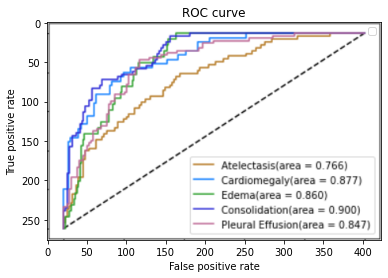

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import cv2
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

for ii in range(0, y_pred_keras.shape[1]):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_labels[:,ii], y_pred_keras[:,ii])
    
    auc_keras = auc(fpr_keras, tpr_keras)

    plt.plot(fpr_keras, tpr_keras, label=features[ii-1] + '(area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

plt.show()
